In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

In [35]:
df = pd.read_pickle('bikeshare.pkl')
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### Experiment 0

Bring coefficients to standard scale and transform the target.

In [36]:
X,y = df[['Hour','Temperature(°C)']], df['Rented Bike Count']

In [48]:
y = np.exp((y + abs(y.min())))
y_trans = np.log1p(y)

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [50]:
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)

In [51]:
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [46]:
regr_trans.score(X_test,y_test)

-0.001754989610161184

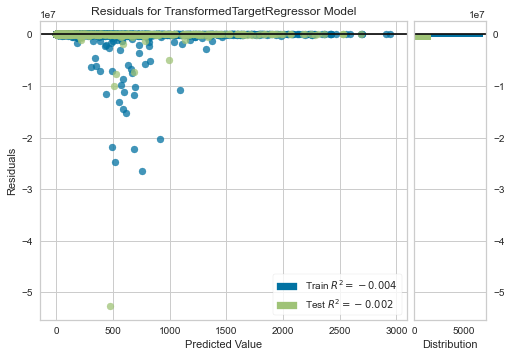

In [47]:
visualizer = ResidualsPlot(regr_trans)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.show()